In [1]:
import os
print(os.getcwd())
os.chdir('../')
print(os.getcwd())

/Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Notebooks/test_notebooks
/Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Notebooks


In [2]:
from mymodules import filters

In [2]:
from mymodules.filter import filters

In [4]:
from mymodules.filter.basic_filters import get_lines_hough, equalized_image, image_binary

In [5]:
import inspect

# 獲取 filters 模組中的所有自定義函數（非內建）並將它們放入一個列表中
function_list = [obj for name, obj in inspect.getmembers(filters) if inspect.isfunction(obj) and obj.__module__ == filters.__name__]

function_name_list = []
# 你現在可以取用這些函數，例如調用它們
for func in function_list:
    function_name_list.append(func.__name__)
    print(f"Function name: {func.__name__}")
    # 如果需要調用函數，可以直接使用 func()

Function name: bilateralFilter
Function name: differenceOfGaussian
Function name: frangiFilter
Function name: gaborFilter
Function name: gaussianBlur
Function name: hessianFilter
Function name: highPassFilter
Function name: horizontal_sobel
Function name: kmeansFilter
Function name: laplacian
Function name: laplacianOfGaussian
Function name: meanFilter
Function name: medianBlur
Function name: morphologicalGradient
Function name: nonLocalMeansFilter
Function name: ridgeFilter
Function name: sideWindowFilter
Function name: vertical_sobel


In [7]:
import cv2  # 用於讀取圖片
import numpy as np  # 用於數學運算
import matplotlib.pyplot as plt  # 用於圖形顯示
import pathlib

In [8]:
import datetime
now = datetime.datetime.now()
f"{now.date()}"

folder_path = pathlib.Path(r"/Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Resources/outputs/pdf")
folder_path = folder_path / f"{now.date()}"
folder_path.mkdir(parents=True, exist_ok=True) # 確保目錄存在，不存在則創建
folder_path.as_posix()

template_folder_path = folder_path / 'template'
template_folder_path.mkdir(parents=True, exist_ok=True)

import os
origin_image_folder = pathlib.Path(r"/Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Resources/Data/Exp_20240925_AUO")
origin_images = os.listdir(origin_image_folder.as_posix())
origin_images = [image for image in sorted(origin_images) if image[-4:]==".tif"]
origin_images

['1_1.tif',
 '1_2.tif',
 '2_1.tif',
 '2_2.tif',
 '3_1.tif',
 '3_2.tif',
 '4_1.tif',
 '4_2.tif',
 '5_1.tif',
 '5_2.tif',
 '6_1.tif',
 '6_2.tif']

Image changed to Blue channel
Name: 5_2.tif
Folder: /Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Resources/Data/Exp_20240925_AUO
Type:  <class 'numpy.ndarray'>
Shape:  (1000, 2048)
Max:  166
Min:  0
Mean:  0.5761640625
Standard Deviation:  5.107244090470523


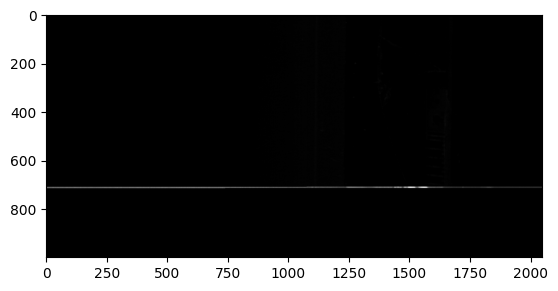

In [32]:
image_number = 9
# image_number = 0
origin_image_path = origin_image_folder / origin_images[image_number]
origin_name = origin_image_path.name

from mymodules.image_manager import ImageManager

origin_im = ImageManager(origin_image_path.as_posix())
origin_im.choose_rgb('b')

origin_im.basic_array_info()
origin_im.show()

Image changed to Blue channel
Name: 5_2.tif
Folder: /Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Resources/Data/Exp_20240925_AUO
Type:  <class 'numpy.ndarray'>
Shape:  (1000, 2048)
Max:  166
Min:  0
Mean:  0.5761640625
Standard Deviation:  5.107244090470523


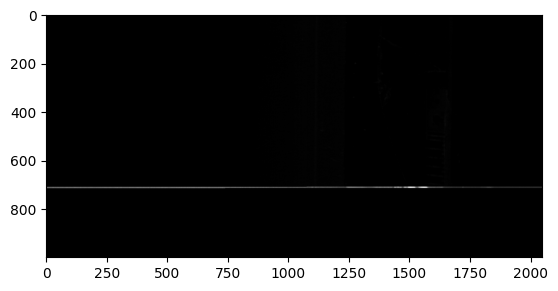

In [33]:
from mymodules.image_manager import ImageManager

origin_im = ImageManager(origin_image_path.as_posix())
origin_im.choose_rgb('b')

origin_im.basic_array_info()
origin_im.show()

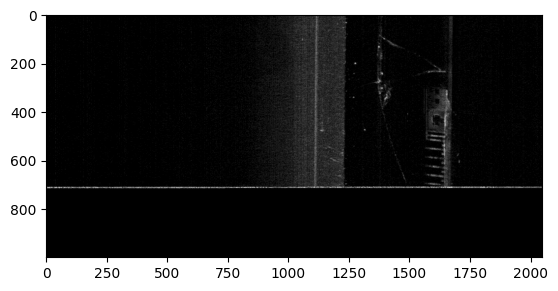

In [9]:
origin_im.image = origin_im.image * 30
origin_im.show()

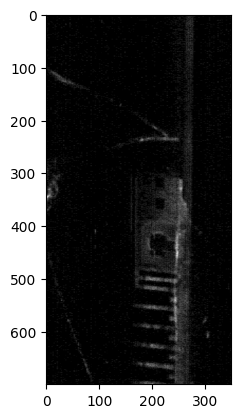

In [34]:
# origin_im.crop(1100, 1350, 200, 700) # 1
origin_im.crop(1400, 1750, 0, 700) # 9

In [11]:
[(i, name) for (i, name) in enumerate(function_name_list)]

[(0, 'bilateralFilter'),
 (1, 'differenceOfGaussian'),
 (2, 'frangiFilter'),
 (3, 'gaborFilter'),
 (4, 'gaussianBlur'),
 (5, 'hessianFilter'),
 (6, 'highPassFilter'),
 (7, 'horizontal_sobel'),
 (8, 'kmeansFilter'),
 (9, 'laplacian'),
 (10, 'laplacianOfGaussian'),
 (11, 'meanFilter'),
 (12, 'medianBlur'),
 (13, 'morphologicalGradient'),
 (14, 'nonLocalMeansFilter'),
 (15, 'ridgeFilter'),
 (16, 'sideWindowFilter'),
 (17, 'vertical_sobel')]

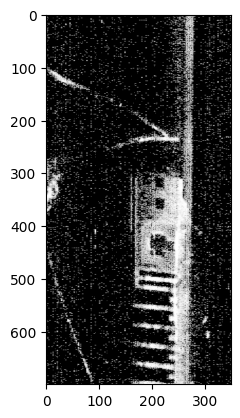

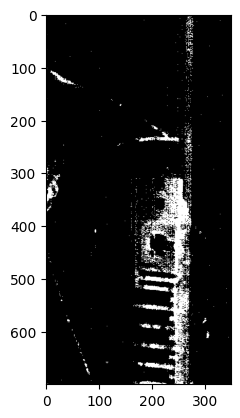

In [35]:
equalized_im = origin_im.process(equalized_image)
equalized_im.show()
ib_im = equalized_im.process(image_binary)
ib_im.show()

In [13]:
import cv2
import numpy as np
import math

def get_lines_hough_with_mask(image, threshold=30, min_line_length=50, max_line_gap=25, distance=10):
    lines = cv2.HoughLinesP(image, rho=1, theta=np.pi/180, threshold=threshold,
                            minLineLength=min_line_length, maxLineGap=max_line_gap)
    
    mask = np.zeros_like(image)

    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                if x2 - x1 != 0:
                    slope = (y2 - y1) / (x2 - x1)
                    angle = abs(math.degrees(math.atan(slope)))

                    if angle < 70:
                        # 使用 thickness 参数来扩展线段的宽度
                        cv2.line(mask, (x1, y1), (x2, y2), 255, thickness=2*distance)

    result_image = np.where(mask == 255, image, 0)

    return result_image

In [14]:
function_list[6].__name__

'highPassFilter'

In [15]:
def canny(image, ):
    pass

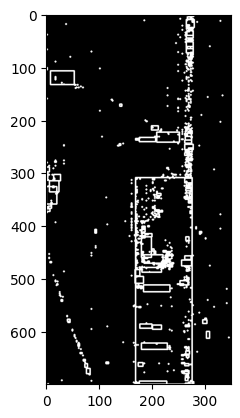

In [16]:
process_im = origin_im.process(image_binary)
process_im.image

contours, _ = cv2.findContours(process_im.image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

result_image = np.zeros_like(process_im.image)
# 繪製邊界框
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(result_image, (x, y), (x + w, y + h), (255, 0, 0), 2)  # 繪製藍色的矩形框
    
plt.imshow(result_image, cmap='gray')

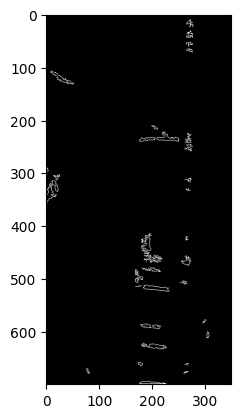

In [17]:
process_im = origin_im.process(image_binary)
binary_image = process_im.image

# 檢測輪廓
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# 創建一個空白圖像來繪製符合條件的曲線
curve_image = np.zeros_like(binary_image)

# 遍歷所有檢測到的輪廓
for contour in contours:
    # 計算輪廓的周長
    length = cv2.arcLength(contour, closed=False)
    
    # 如果輪廓的周長大於指定的最小長度，則繪製該曲線
    if length > 20 and length < 300:
        cv2.drawContours(curve_image, [contour], -1, 255, 1)
plt.imshow(curve_image, cmap='gray')

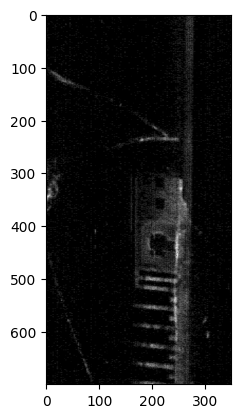

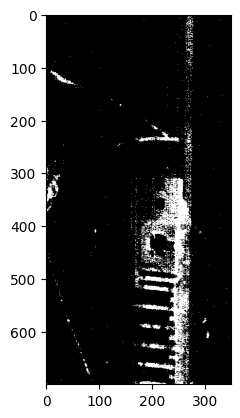

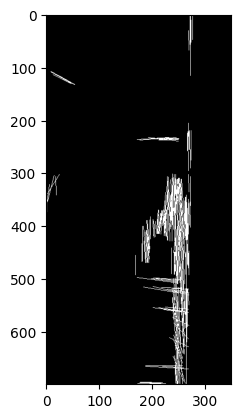

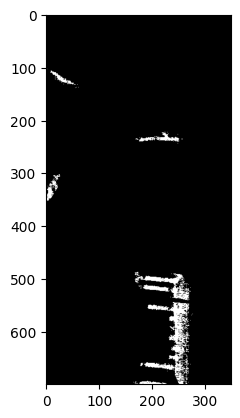

In [19]:
origin_im

process_im = origin_im
process_im.image = process_im.image
process_im.show()

# process_im = process_im.process(function_list[6])
# process_im.show()


process_im = process_im.process(image_binary)
process_im.show()

lines_im = process_im.process(get_lines_hough, params={'threshold': 20, 'min_line_length': 30, 'max_line_gap': 5})
lines_im.show()

# 接著進行霍夫線檢測
lines2_im = process_im.process(get_lines_hough_with_mask, params={'threshold': 20, 'min_line_length': 30, 'max_line_gap': 5})
lines2_im.show()


群集數量（包括雜訊）: 6


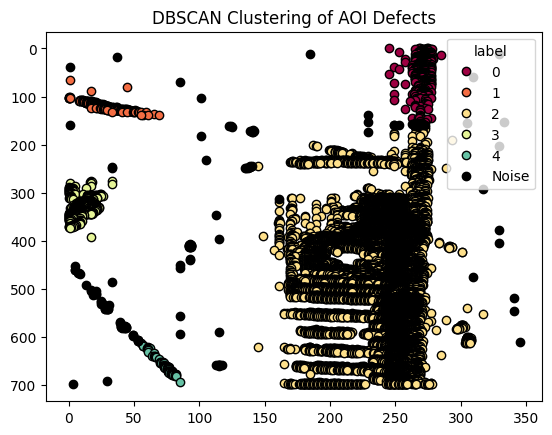

In [31]:
import numpy as np
import cv2
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

def dbscan(image, eps=30, min_samples=50):
    """應用 DBSCAN 演算法進行瑕疵聚類"""
    # 找到二值影像中的非零像素位置
    coords = np.column_stack(np.where(image > 0))
    
    # 使用 DBSCAN 進行聚類
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(coords)
    
    # 返回聚類標籤
    return coords, db.labels_

# 假設 origin_im 是自定義類別，具有 .image 方法
binary_im = origin_im.process(image_binary)
image = binary_im.image

# 使用 DBSCAN 聚類
coords, labels = dbscan(image)

# 獲取唯一標籤 (群集數)
unique_labels = set(labels)
print(f"群集數量（包括雜訊）: {len(unique_labels)}")

# 分配顏色
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

# 初始化畫布
fig, ax = plt.subplots()

# 繪製並列出每個群集的顏色
for k, col in zip(unique_labels, colors):
    if k == -1:
        # 雜訊點用黑色表示
        col = [0, 0, 0, 1]
        label = "Noise"
    else:
        label = f"{k}"

    # 顯示每個群集的像素點
    class_member_mask = (labels == k)
    xy = coords[class_member_mask]
    
    ax.plot(xy[:, 1], xy[:, 0], 'o', markerfacecolor=tuple(col),
            markeredgecolor='k', markersize=6, label=label)

# 顯示群集標籤和顏色在圖例中
ax.legend(loc='upper right', title="label")
plt.title('DBSCAN Clustering of AOI Defects')
plt.gca().invert_yaxis()  # 使影像顯示正確方向
plt.show()

In [ ]:
process_im.show()